## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data_df=pd.merge(study_results, mouse_metadata, how='inner', on="Mouse ID")
# Display the data table for preview
complete_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
print(complete_data_df['Mouse ID'].nunique())

249


In [4]:
complete_data_df.loc[complete_data_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_data=complete_data_df.loc[complete_data_df["Mouse ID"] == 'g989']
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = complete_data_df.drop(duplicated_data.index)
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
(clean_data_df["Mouse ID"].nunique())

248

## Summary Statistics

In [8]:
clean_data_df['Drug Regimen'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

vol_mean = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
vol_median = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
vol_var = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
vol_std = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
vol_sem=clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stat_df = pd.DataFrame({"Mean Tumor Volume" : vol_mean,
                                "Median Tumor Volume" : vol_median,
                                "Tumor Volume Variance" : vol_var,
                                "Tumor Volume Std. Dev." : vol_std,
                                "Tumor Volume Std. Err." : vol_sem})

summary_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

second_summary_df = clean_data_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])
second_summary_df = second_summary_df[["Tumor Volume (mm3)"]]
second_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


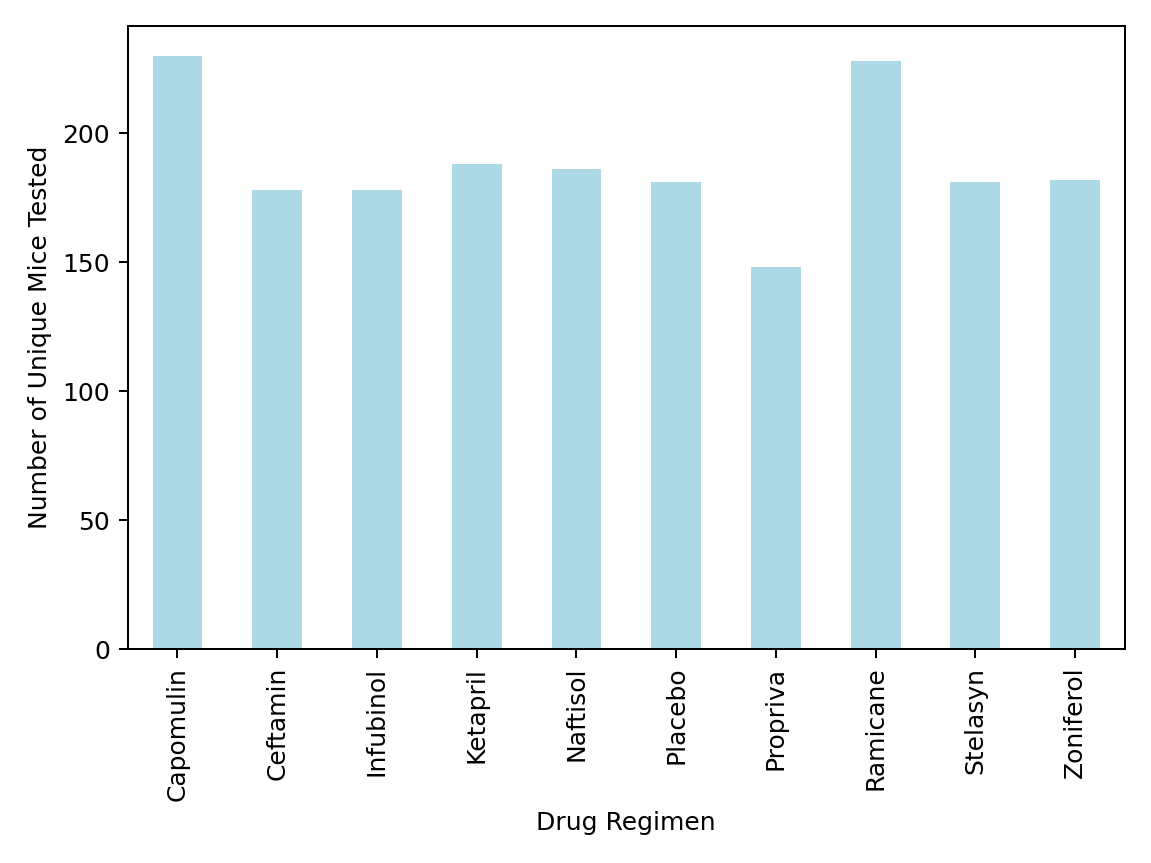

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
%matplotlib notebook

mouse_count = clean_data_df.groupby('Drug Regimen')['Mouse ID'].count()

count_chart = mouse_count.plot(kind='bar', color='lightblue')
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Unique Mice Tested")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


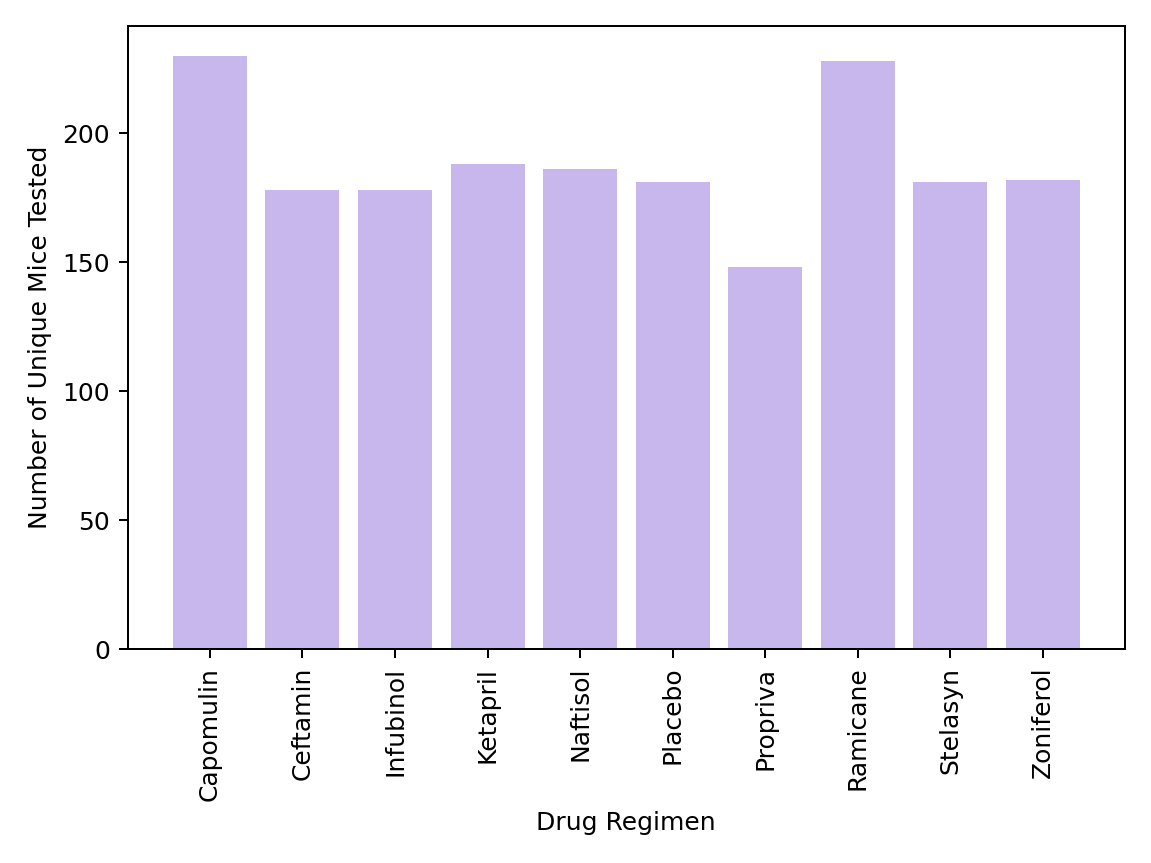

In [12]:
%matplotlib notebook

mouse_counts = clean_data_df.groupby('Drug Regimen')['Mouse ID'].count()
x_axis = np.arange(clean_data_df['Drug Regimen'].nunique())

plt.bar(x_axis, mouse_counts, color = 'mediumpurple', alpha=0.5, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(summary_stat_df.index), rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")


plt.show()
plt.tight_layout()


In [13]:
mouse_s = clean_data_df.groupby('Sex')['Mouse ID'].count()
mouse_s

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


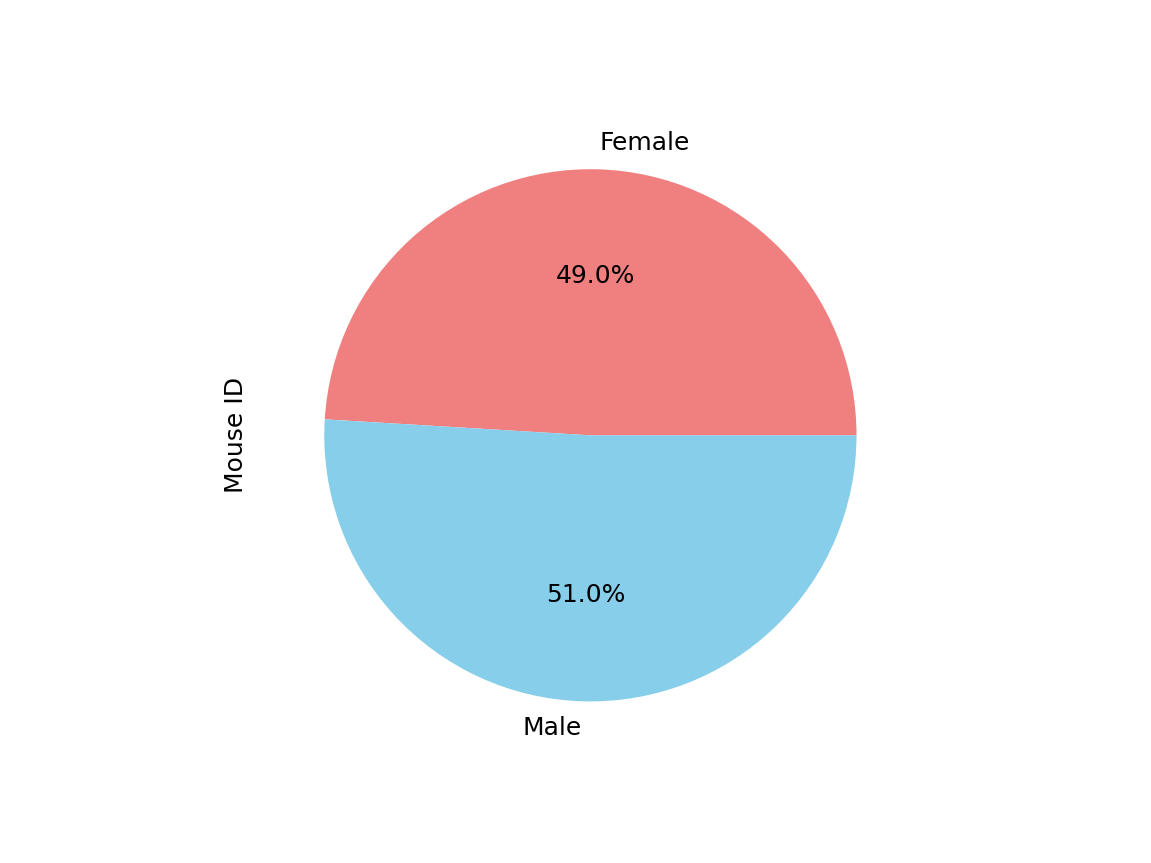

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
%matplotlib notebook
mouse_s = clean_data_df.groupby('Sex')['Mouse ID'].count()
sizes = [922, 958]
labels = ["Female", "Male"]
colors = ["lightcoral", "skyblue"]
s_pie = mouse_s.plot(kind='pie', labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()

<IPython.core.display.Javascript object>


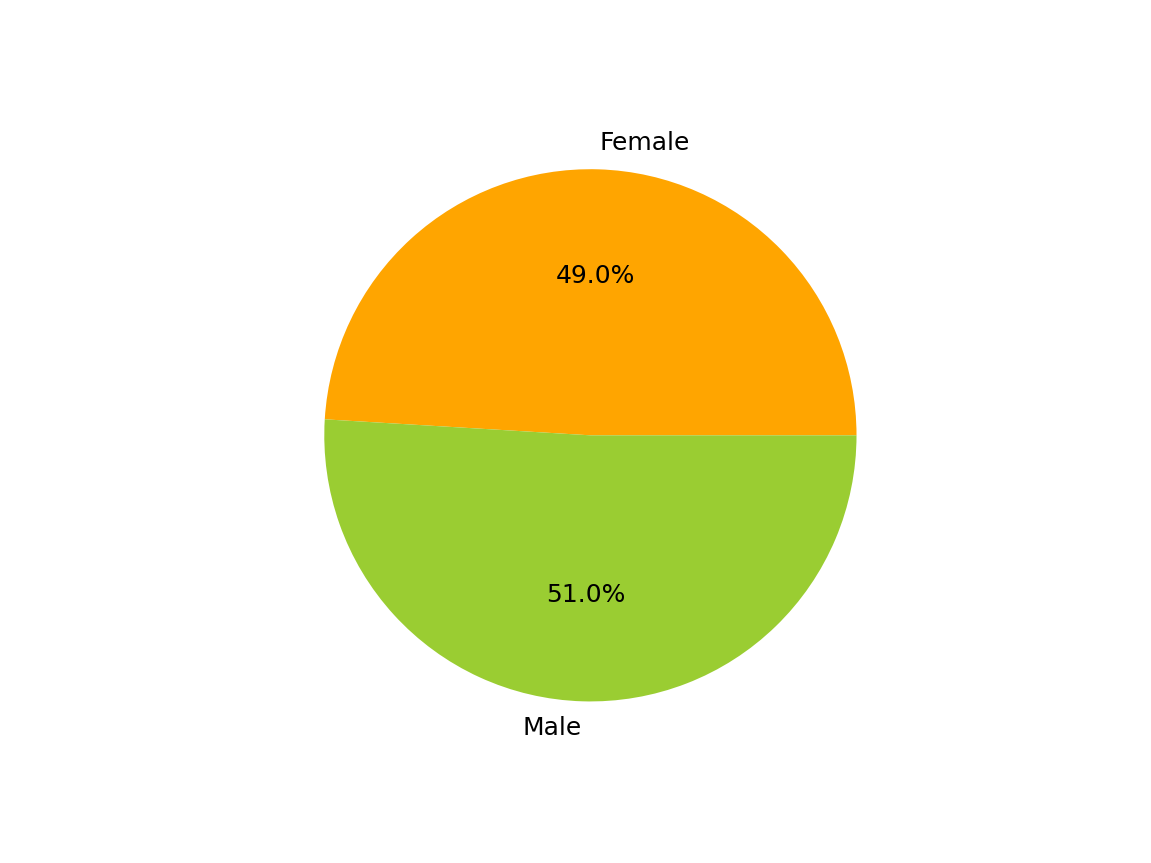

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook
mouse_s = clean_data_df.groupby('Sex')['Mouse ID'].count()
sizes = [922, 958]
labels = ["Female", "Male"]
colors = ["orange", "yellowgreen"]
plt.pie(mouse_s, labels=labels,  colors=colors, autopct="%1.1f%%");

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

final_vol = clean_data_df.groupby(["Mouse ID"])['Timepoint'].max()
final_vol = final_vol.reset_index()

In [17]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = final_vol.merge(clean_data_df, on =["Mouse ID", "Timepoint"], how="left")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<IPython.core.display.Javascript object>


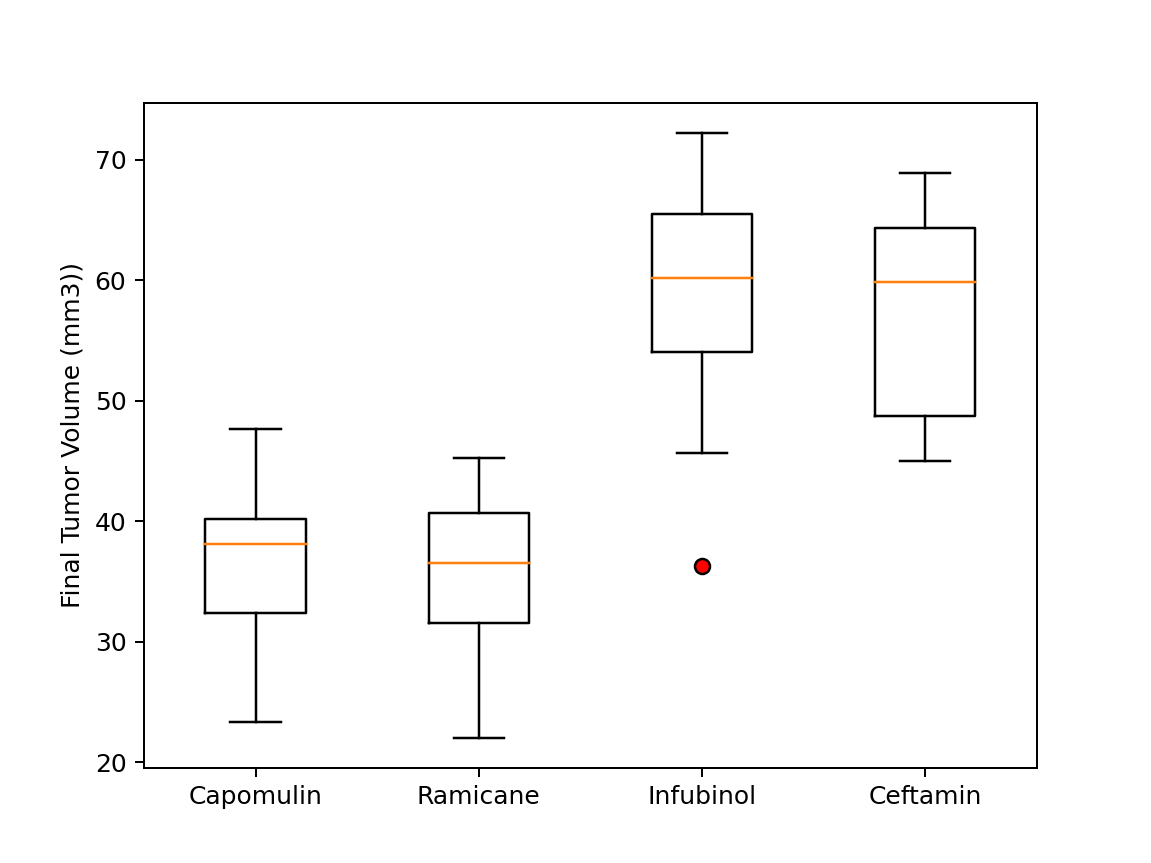

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol_list,
           flierprops={'marker':'o',
                      'markerfacecolor': 'red',
                       'markeredgecolor' : 'black'
                      })

plt.ylabel("Final Tumor Volume (mm3))")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()


## Line and Scatter Plots

<IPython.core.display.Javascript object>


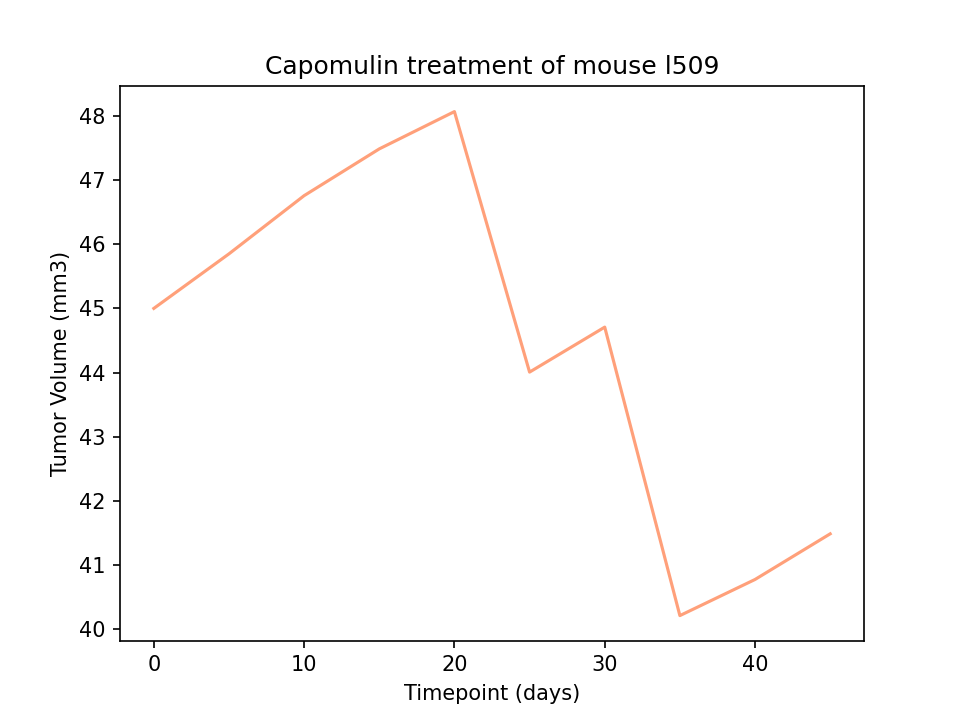

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
fig, ax= plt.subplots()
Cap_df = clean_data_df.loc[(clean_data_df["Drug Regimen"]=="Capomulin") & (clean_data_df["Mouse ID"] == "l509")]
plt.plot(Cap_df["Timepoint"], Cap_df["Tumor Volume (mm3)"], color="lightsalmon")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

<IPython.core.display.Javascript object>


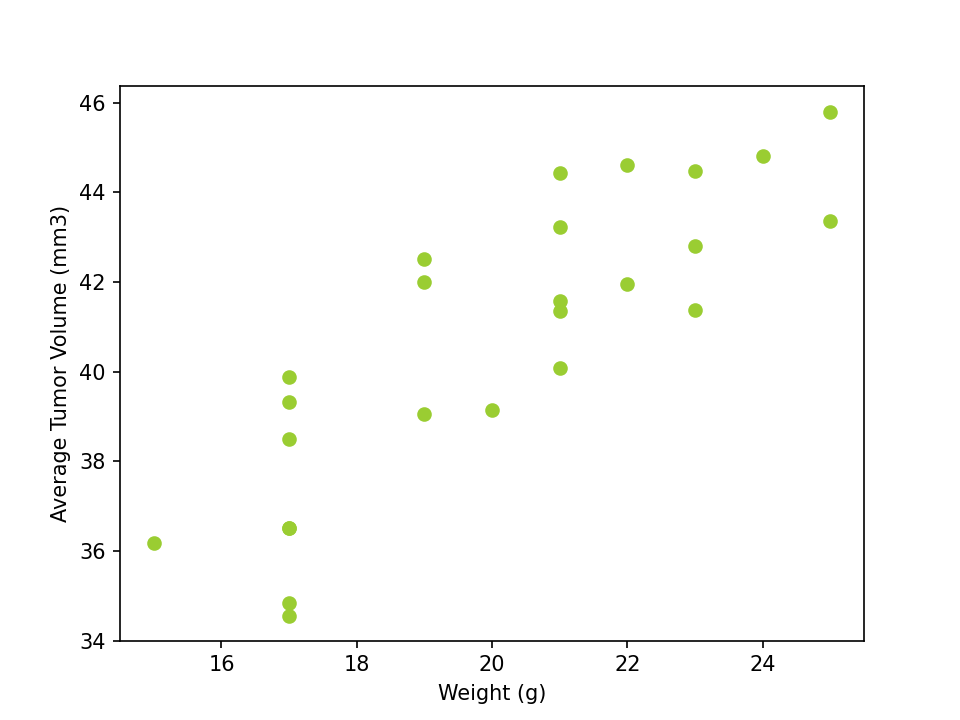

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig, ax=plt.subplots(1)
Cap = clean_data_df.loc[clean_data_df["Drug Regimen"]=="Capomulin"]
volumes = Cap.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
weights = Cap.groupby("Mouse ID")['Weight (g)'].mean()
x_value = weights
y_value = volumes 

plt.scatter(x_value,y_value, color="yellowgreen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

<IPython.core.display.Javascript object>


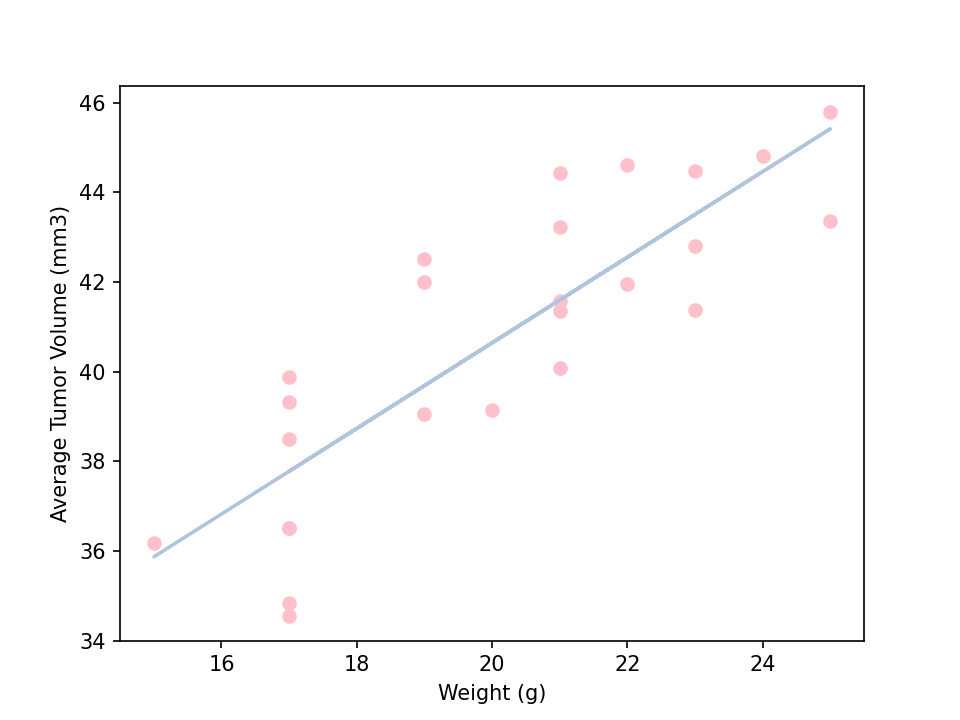

The correlation between mouse weight and the average tumor volume is 0.84


In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

fig, ax=plt.subplots(1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.scatter(x_value,y_value, color="pink")
plt.plot(x_value,regress_values, color="lightsteelblue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
cor = st.pearsonr(x_value, y_value)

print(f"The correlation between mouse weight and the average tumor volume is {round(cor[0],2)}")
plt.show()